# Safe-Ada-BKB: AdaBKB for Safe optimization
In this notebook, we'll see how to use SafeAdaBKB implementation

In [1]:
import numpy as np
#import seaborn as sns
import itertools as it
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import griddata
from sklearn.gaussian_process.kernels import RBF



#plt.style.use("seaborn")

## Preliminaries: Target function and safety threshold

Text(-0.5, -1.0, '$f(x^*)$')

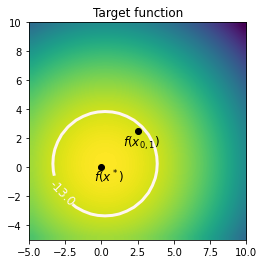

In [2]:
def target_fun(x):
    return -np.square(x).sum(axis=1)

search_space = np.array([[-5.0, 10.0], [-5.0, 10.0]]) # domain boundaries

root_x = search_space.mean(axis=1).reshape(-1, 2) # x0
jmin = -13.0 # safety threshold

delta = 0.5
x = np.arange(-5.0, 10.0, delta)
y = np.arange(-5.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z =  -(X**2 + Y**2) #(np.exp(-X**2 - Y**2) - np.exp(-(X - 1)**2 - (Y - 1)**2))
#target_fun(np.array([X, Y]).reshape(-1, 2))




fig, ax = plt.subplots()
ax.set_xlim([-5.0, 10.0])
ax.set_ylim([-5.0, 10.0])
ax.set_title('Target function')
ax.imshow(Z, interpolation ='bilinear',
               origin ='lower',
               cmap ="viridis", 
               extent =(-5, 10, -5, 10))
  
levels = np.arange(jmin, 0, 13)
CS = ax.contour(Z, levels, 
                origin ='lower',
                cmap ='Reds',
                linewidths = 2,
                extent =(-5, 10, -5, 10))
  
zc = CS.collections[0]
plt.setp(zc, linewidth = 3)
   
ax.clabel(CS, levels,
          inline = 1, 
          fmt ='% 1.1f',
          fontsize = 12)
ax.plot(root_x[0,0], root_x[0,1], 'o', c="black")
ax.text(root_x[0,0]-1.0, root_x[0, 1]-1.0, "$f(x_{0,1})$", fontsize=12)
ax.plot(0.0, 0.0, 'o', c="black")
ax.text(-1/2, -1.0,"$f(x^*)$", fontsize=12)
#ax.annotate("$f(x_{0,1})$", (root_x[0,0], root_x[0,1]), xytext=(root_x[0,0]-3.5, root_x[0,1]-3.5),\
#    fontsize=14, color="white", arrowprops={'arrowstyle':"->", "color":"white", "lw":2})
#ax.legend(loc="lower right", fancybox=True, framealpha=0.50)



In [3]:
from adabkb.optimizer import SafeAdaBKB
from adabkb.options import OptimizerOptions
from adabkb.kernels import GaussianKernel

sigma = 1.0
lam = 1e-7

kernel = GaussianKernel(sigma)
N = 3
rho = N ** (-1/2)
v_1 = N * np.sqrt(2)
F = 1

options = OptimizerOptions(kernel, v_1 =v_1, rho=rho, sigma=sigma, lam=lam, fnorm=F)
opt = SafeAdaBKB(RBF(sigma),jmin,options=options)



TypeError: __init__() got an unexpected keyword argument 'noise_var'